Columns in the dataset: Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')
Data loaded and cleaned.
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016

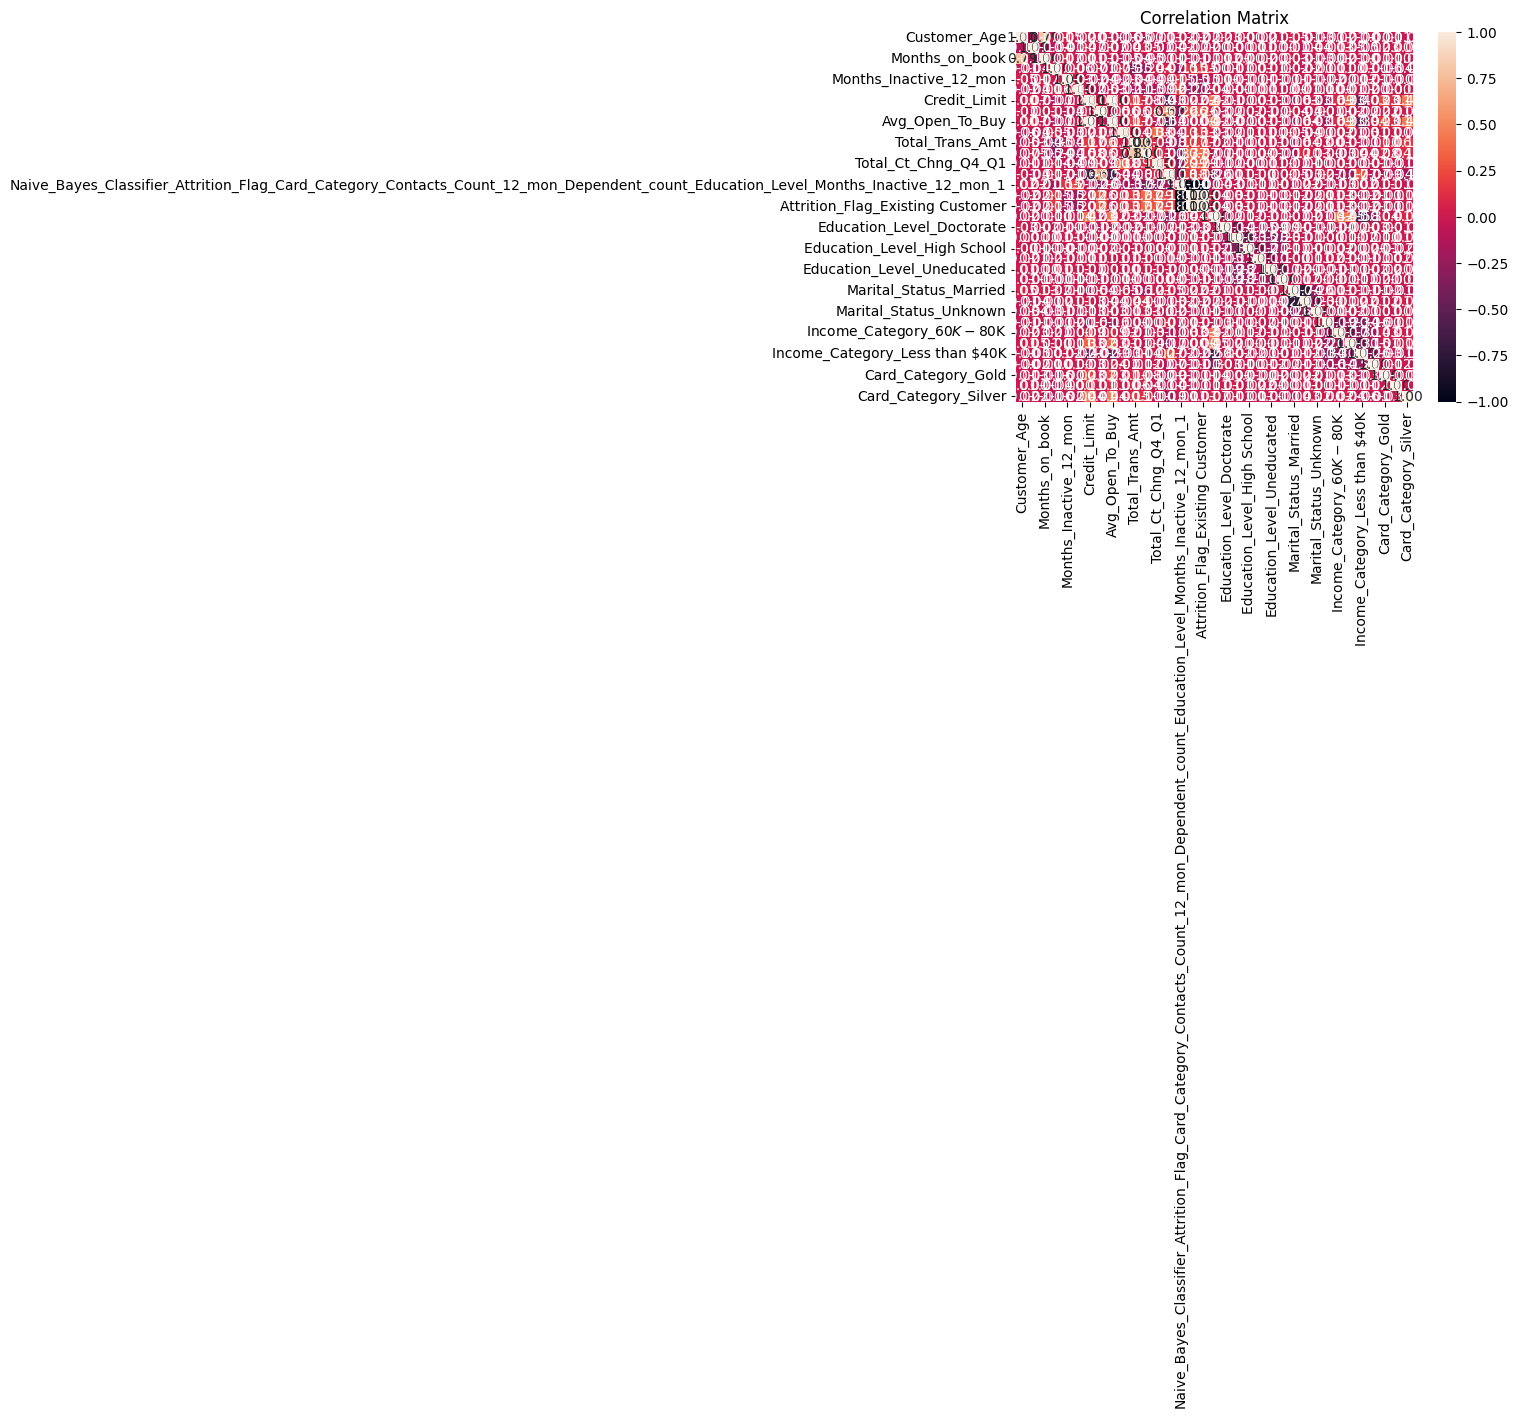

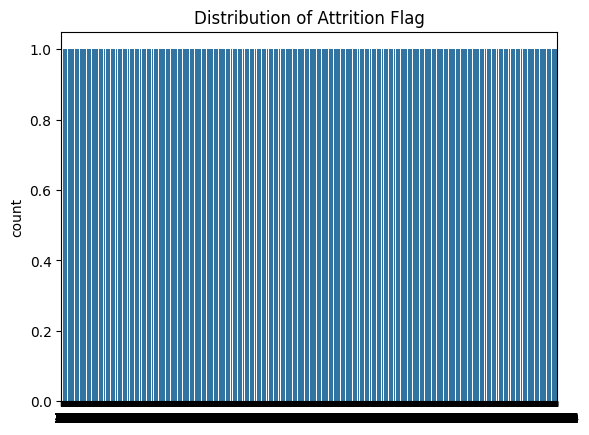

EDA completed.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Feature selection completed.
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       496
        True       1.00      1.00      1.00      2543

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039

Model development completed.
Final output saved to CSV.


In [2]:
# Final Data Science project - Japtesh, Ayush, Dishant, Akash
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Data Loading and Cleaning
file_path = 'BankChurners.csv'
data = pd.read_csv(file_path)

# Check the column names
print("Columns in the dataset:", data.columns)

# Drop irrelevant columns if they exist
columns_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_',
                   'Naive_Bayes_Classifier_Attrition_Flag_Contacts_Count_12_mon_']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=existing_columns_to_drop)

# Handle missing values
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

print("Data loaded and cleaned.")

# Step 2: Exploratory Data Analysis (EDA)
# Basic statistics
print(data.describe())

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable
sns.countplot(data['Attrition_Flag_Existing Customer'])
plt.title('Distribution of Attrition Flag')
plt.show()

print("EDA completed.")

# Step 3: Feature Selection
# Define features and target variable
X = data.drop(columns=['Attrition_Flag_Existing Customer'])
y = data['Attrition_Flag_Existing Customer']

# Feature selection using RandomForest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

# Create a new DataFrame with selected features
selected_features = X.columns[(model.get_support())]
data_selected = pd.DataFrame(X_new, columns=selected_features)
data_selected['Attrition_Flag_Existing Customer'] = y.values

print("Feature selection completed.")

# Step 4: Model Development
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Model development completed.")

# Predict on the entire dataset to add the prediction column
data_selected['Prediction'] = model.predict(X_new)

# Add a column indicating whether a person is likely to stay with the bank
# Assuming 'Attrition_Flag_Existing Customer' == 1 means staying with the bank
data_selected['Likely_to_Stay'] = data_selected['Prediction'].apply(lambda x: 'True' if x == 1 else 'False')

# Step 5: Saving the Final Output
# Save the final dataset to a CSV file
output_file_path = 'selected_features_with_predictions.csv'
data_selected.to_csv(output_file_path, index=False)

print("Final output saved to CSV.")

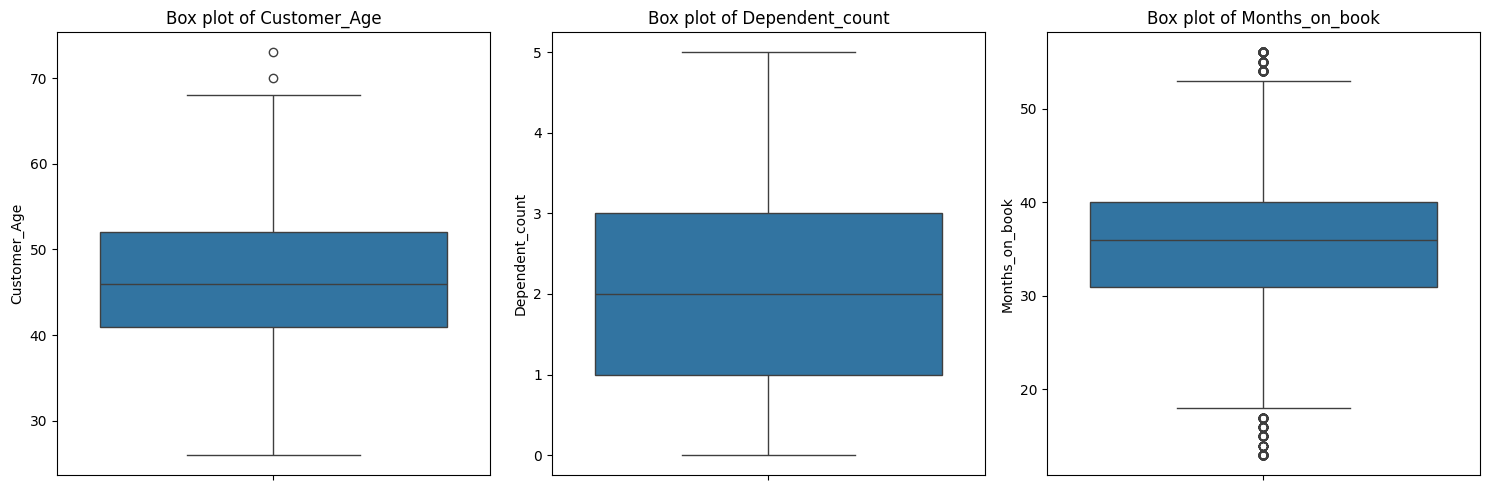

In [4]:
# Plot box plots for numerical columns
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

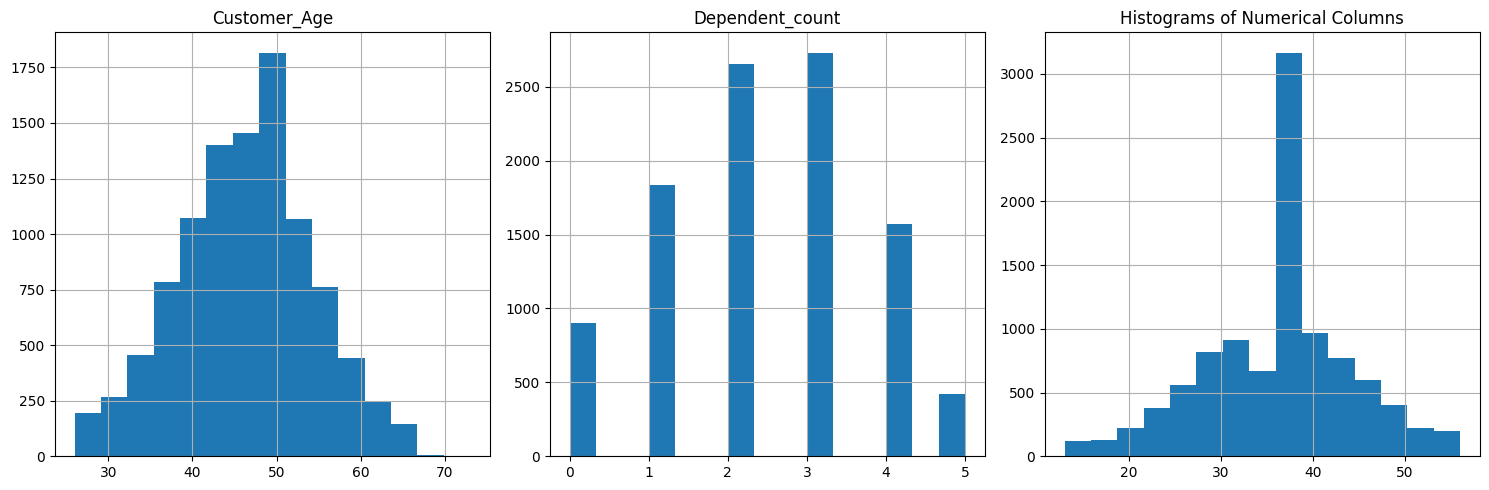

<Figure size 640x480 with 0 Axes>

In [17]:
# Histograms for numerical columns
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data[numerical_columns].hist(bins=15, figsize=(15, 5), layout=(1, len(numerical_columns)))
plt.tight_layout()
plt.title('Histograms of Numerical Columns')
plt.show()

plt.tight_layout()
plt.show()
